# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
# Libraries for reading and managing data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,precision_recall_curve,roc_curve,make_scorer

# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

## Data Overview

- Observations
- Sanity checks

In [2]:
#Load the data set
data=pd.read_csv("ExtraaLearn.csv")

In [3]:
#Now we check the tail and head of our data set
data.head()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [4]:
data.tail()

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0
4611,EXT4612,55,Professional,Website,Medium,4,2290,2.075,Phone Activity,No,No,No,No,No,0


In [6]:
#We looks how many columns and rows our dataset has
data.shape

(4612, 15)

Observation: We have 4612 rows and 15 columns

In [7]:
#Now we check the data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Observation: Most of the data types are object type (categorial values).

In [8]:
#Check about unique values
data.nunique()

ID                       4612
age                        46
current_occupation          3
first_interaction           2
profile_completed           3
website_visits             27
time_spent_on_website    1623
page_views_per_visit     2414
last_activity               3
print_media_type1           2
print_media_type2           2
digital_media               2
educational_channels        2
referral                    2
status                      2
dtype: int64

Observations:
ID column is all unique values. We will remove that variable since it will not help our model.
Age has 46 unique values; we might create a range in values.
Time spend on website and page views per visit also have a lot of unique values; we could make ranges.

In [11]:
#Check about missing values
missing_values_mask = data.isnull()
missing_values_count = missing_values_mask.sum()
print(missing_values_count)

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


Observations: We don't have any missing values.

In [13]:
#Eliminate ID column
data.drop(columns='ID',inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

Observations: ID column is not there anymore.

In [15]:
#Now we check the statistics for the numerical variables
data.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


Observations:
1.- Average age is 46 years old. Also, 50% and75 percentile have also ages above 50. This makes us think most people that are interested in online learning are middle age people, who probably want to improbe their skills to get better jobs or even change carrers.

2.- Number of visits to the website has an average little above 3 with a maximum of 30 that could be an outlier or maybe a very undecided person. That value of 30 could also be becasue of outliers.

3.- Time spend on the website has an average of 724 minutes (12 hours). The maximym value seems too extreme, as the 75% percentile.

4.- Pages view per visit has an average of 3, and the 25%, 50% and 75% percentiles show about the same. Max value seems also a little extreme.

5.- For Status, which is our target variable, seems just a third of leads purchase an online course.

In [20]:
# Check our catergorical variables 
categorical_col=['current_occupation', 'first_interaction','profile_completed','last_activity',
                'print_media_type1','print_media_type2','digital_media','educational_channels','referral']

# Printing number of count of each unique value in each column
for column in categorical_col:
    print(data[column].value_counts())
    print('-'*50)

current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

Observations: All looks good; not weird values or values that maybe were typed incorrectly.

In [23]:
#Changing categorical variables to data type 'category'; this to have better performance and because
# our variables don't have too many options. 
for column in categorical_col:
    data[column]=data[column].astype('category')

In [24]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   age                    4612 non-null   int64   
 1   current_occupation     4612 non-null   category
 2   first_interaction      4612 non-null   category
 3   profile_completed      4612 non-null   category
 4   website_visits         4612 non-null   int64   
 5   time_spent_on_website  4612 non-null   int64   
 6   page_views_per_visit   4612 non-null   float64 
 7   last_activity          4612 non-null   category
 8   print_media_type1      4612 non-null   category
 9   print_media_type2      4612 non-null   category
 10  digital_media          4612 non-null   category
 11  educational_channels   4612 non-null   category
 12  referral               4612 non-null   category
 13  status                 4612 non-null   int64   
dtypes: category(9), float64(1), int64(4)
mem

In [28]:
# We make a copy of our dataset and we will start using the information in df
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

**1.- Leads will have different expectations from the outcome of the course and the current occupation may play 
a key role in getting them to participate in the program. 
Find out how current occupation affects lead status.

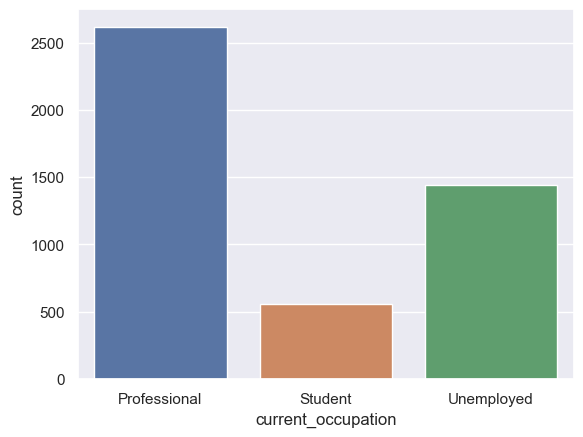

In [35]:
#Current occupation
sns.countplot(x = df['current_occupation'])
plt.show()

In [36]:
# Defining the stacked_barplot() function
def stacked_barplot(data,predictor,target,figsize=(10,6)):
  (pd.crosstab(data[predictor],data[target],normalize='index')*100).plot(kind='bar',figsize=figsize,stacked=True)
  plt.legend(loc="lower right")
  plt.ylabel(target)

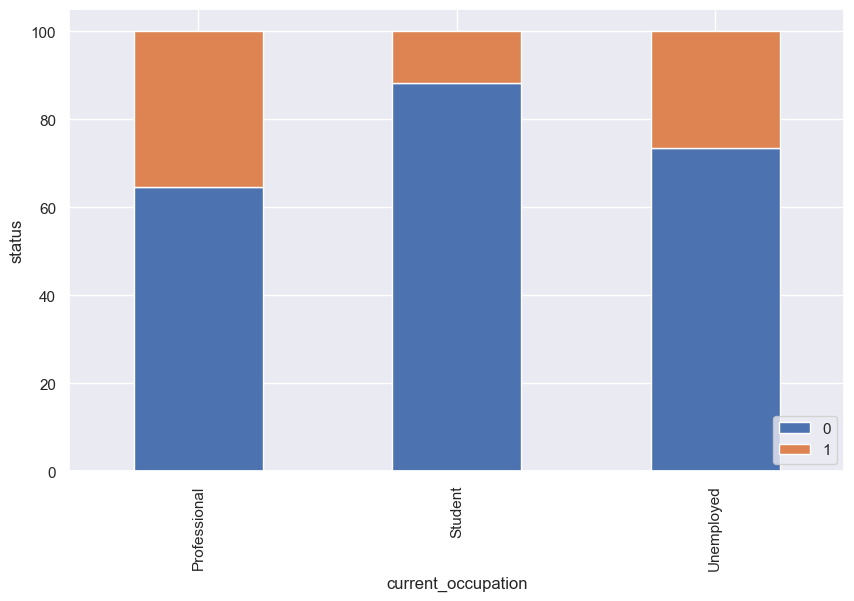

In [37]:
stacked_barplot(data, "current_occupation", "status" )

Observations: Here we see that the leads that are Professionals, working right now, are the ones with higher number of
entrie in our data set, but also are the ones that have bought more online course when we compare their occupation with our target variable status. This group might be interested in getting new knoledge and skills to aspire for highier possitions in their jobs or looking for better a better job.

After professionals, the Unemployed ones seem to have the second place on getting online course. This could make us think people that are unemployed are looking for new skills to make them more attractive prospects for jobs; it can also be this unemployed group is interested in changing carrers and that is why they are aiming for getting new skills.

**2.- The company's first impression on the customer must have an impact. 
Do the first channels of interaction have an impact on the lead status?

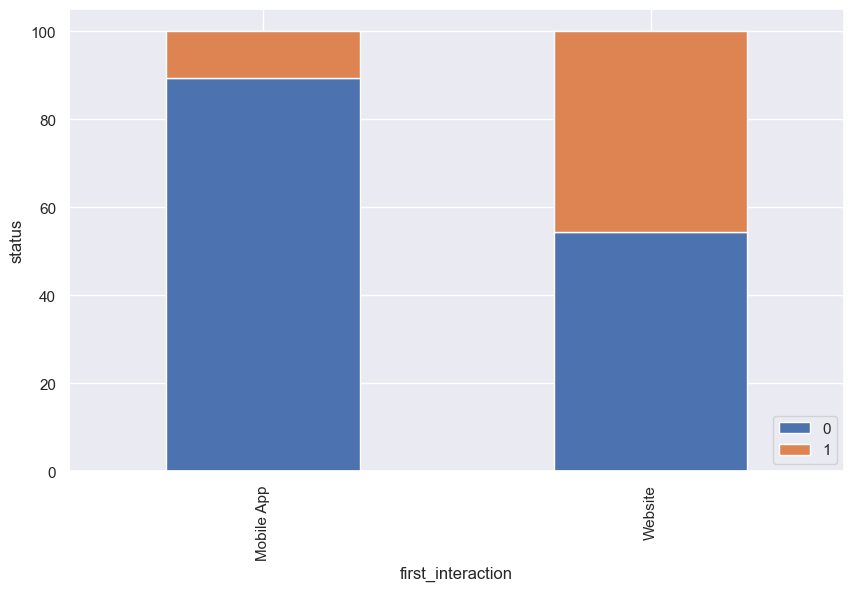

In [38]:
# Let's check how the first_interaction is in relation to our target variable status.
stacked_barplot(data, "first_interaction", "status" )

Observation: Yes; the channels influence leads to get the online course. We see a better performance, getting more sales when people interact on the website. Having a good, efficient, organice and easy to navigate for looking information website is a key element. So company should keep improving website on a normal basis.

**3.- The company uses multiple modes to interact with prospects. Which way of interaction works best?

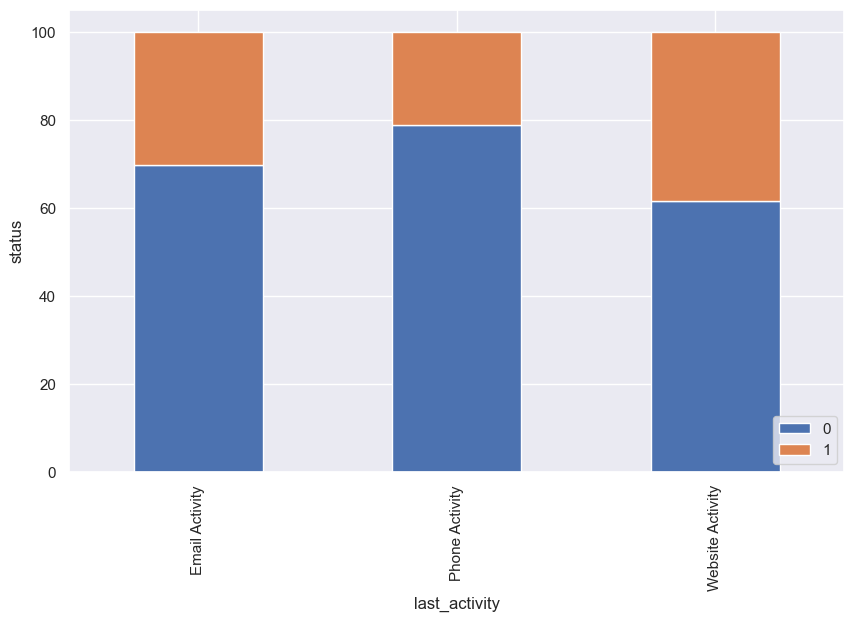

In [41]:
# Lets check the values we have on last_activity and see how is reflected with our target variable
stacked_barplot(data, "last_activity", "status" )

Observations: It looks like the live interaction on the website with a representative brings more sales. Also emails show a good performance; but thinking on the company side, improving live interaction on the website might sound like a good
idea since it's cheaper and more and more people are rejecting to get calls from strange numbers because of spam, and interacting on a website is getting more popular on the lead perspective; also on the company's perspecting, a representative could be attending multiple people at a time, and with a phone call, they are just attending one at a time. Emailig leads is also great for follow up, specially if you have automatic email campains to follow up leads.

**4.- The company gets leads from various channels such as print media, digital media, referrals, etc. 
Which of these channels have the highest lead conversion rate?


In [44]:
#For later analysis
# Creating numerical columns
num_cols=['age','website_visits','time_spent_on_website','page_views_per_visit',]

# Creating categorical variables 
cat_cols= ['current_occupation','first_interaction','profile_completed','last_activity','print_media_type1',
           'print_media_type2','digital_media','educational_channels','referral']

# Creating channels variable
cat_channels= ['print_media_type1','print_media_type2','digital_media','educational_channels','referral']

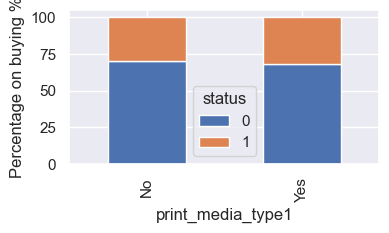

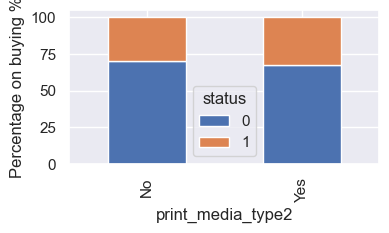

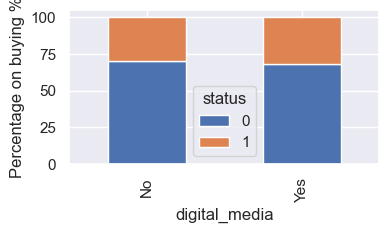

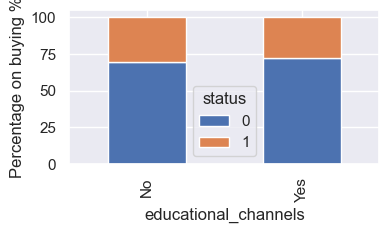

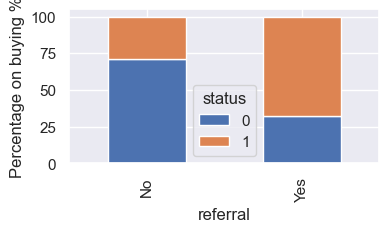

In [49]:
# Lets check the values we have on: print_media_type1, print_media_type2, digital_media,educational_channels, referrals
for i in cat_channels:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(4,2),stacked=True)
        plt.ylabel('Percentage on buying %')

Observations:
It looks like most channels (print, digital, educational) have around 25% success, but on the referral channel
we see a very high perectace, almost 75% who got a referral made a purchase of the course. So here is a great opportunity 
for the company to encourage current and past students to talk about the course to people; word of mouth is always great
tool, possitive or negative (in case you have a bad experience, people might choose not to, for example).
Maybe creating a referral program with students to get gift cards or other prices will encourage them to refer the course.
Also, for the company, is very important to keep extreme good quality in their courses to guarantee the referral is positive.

**5.- People browsing the website or mobile application are generally required to create a profile by sharing 
their personal data before they can access additional information.Does having more details about a prospect increase 
the chances of conversion?

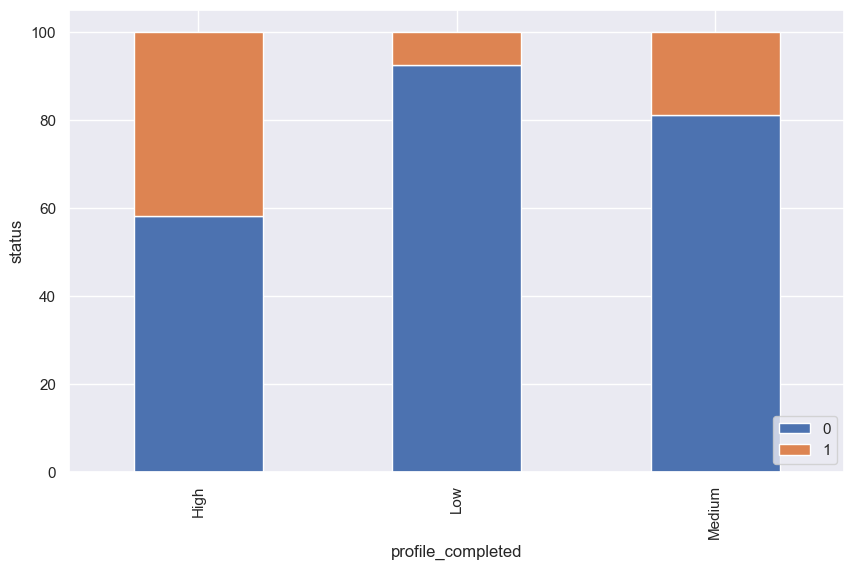

In [50]:
# Lets check the values we have on profile_completed and see how is reflected with our target variable
stacked_barplot(data, "profile_completed", "status" )

Observations:
Yes, having more details about the leads definitely helps on the sale of the course. Might be related on having more channels to contact lead. More information about the leads offers a more specific marketing strategy to target that lead more effective.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [51]:
#Check about missing values
missing_values_mask = data.isnull()
missing_values_count = missing_values_mask.sum()
print(missing_values_count)

age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64


Observations: no missing values were found.

In [52]:
# Feature engineering
# Check our catergorical variables 
cat_col=['current_occupation', 'first_interaction','profile_completed','last_activity',
                'print_media_type1','print_media_type2','digital_media','educational_channels','referral']

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print('-'*50)


current_occupation
Professional    2616
Unemployed      1441
Student          555
Name: count, dtype: int64
--------------------------------------------------
first_interaction
Website       2542
Mobile App    2070
Name: count, dtype: int64
--------------------------------------------------
profile_completed
High      2264
Medium    2241
Low        107
Name: count, dtype: int64
--------------------------------------------------
last_activity
Email Activity      2278
Phone Activity      1234
Website Activity    1100
Name: count, dtype: int64
--------------------------------------------------
print_media_type1
No     4115
Yes     497
Name: count, dtype: int64
--------------------------------------------------
print_media_type2
No     4379
Yes     233
Name: count, dtype: int64
--------------------------------------------------
digital_media
No     4085
Yes     527
Name: count, dtype: int64
--------------------------------------------------
educational_channels
No     3907
Yes     705
Name

In [57]:
# Printing number of count of each unique value in each column
for column in num_cols:
    print(data[column].value_counts())
    print('-'*50)

age
57    385
58    382
56    330
59    328
60    238
55    200
32    188
53     91
24     90
43     89
48     88
51     88
54     88
49     87
21     86
50     85
46     85
23     85
45     84
42     83
19     81
44     81
47     80
52     77
33     76
20     75
34     74
22     71
41     70
18     66
35     66
40     63
37     60
38     58
36     58
39     52
62     48
63     47
30     44
61     38
31     38
29     36
28     27
25     17
26     15
27     14
Name: count, dtype: int64
--------------------------------------------------
website_visits
2     1229
1      755
3      641
4      494
5      422
6      282
7      232
0      174
8      151
9       78
10      34
11      29
12      25
13      23
14      17
15       9
24       3
16       3
25       2
20       2
30       1
18       1
27       1
21       1
17       1
19       1
29       1
Name: count, dtype: int64
--------------------------------------------------
time_spent_on_website
0       174
1        71
83       20
65       19


Observations: Data looks fine and clean.

**Outlier detection and treatment (if needed)


In [66]:
print(df['website_visits'].mean())
print(df['website_visits'].max())
print(df['website_visits'].min())

3.566782307025152
30
0


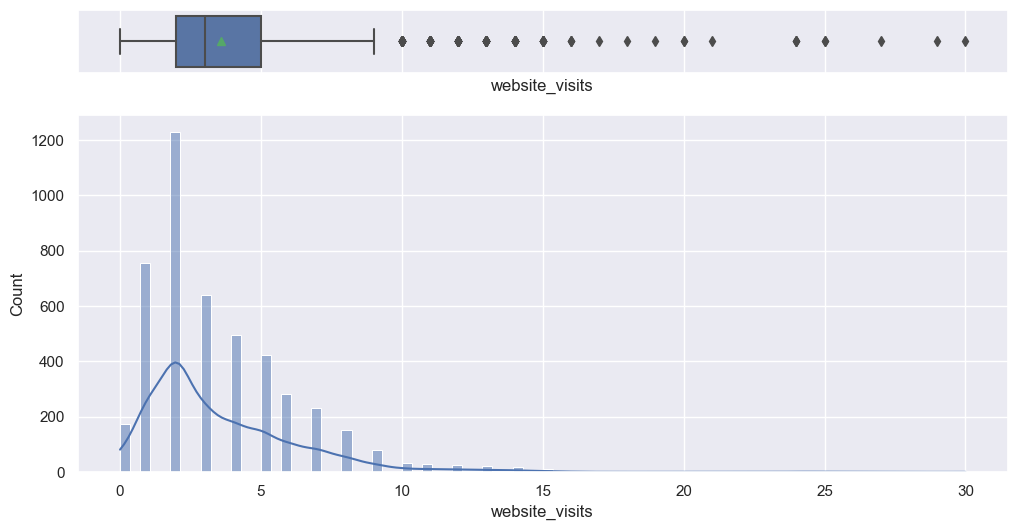

In [62]:
hist_box(df, 'website_visits')

In [78]:
df[df['website_visits']>15]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
66,59,Unemployed,Mobile App,Medium,25,311,2.184,Phone Activity,No,No,Yes,No,No,0
452,24,Student,Mobile App,Low,24,137,6.814,Email Activity,No,No,No,No,No,0
509,24,Student,Mobile App,Medium,30,388,3.566,Website Activity,No,No,No,No,No,0
1045,60,Professional,Website,Medium,16,2072,9.058,Email Activity,Yes,No,Yes,Yes,No,1
1067,57,Professional,Website,High,18,371,3.783,Website Activity,Yes,No,No,No,No,0
1569,55,Professional,Mobile App,Medium,20,33,3.048,Phone Activity,Yes,No,No,No,No,0
1759,20,Student,Website,High,27,417,2.071,Email Activity,No,No,No,No,No,0
1933,56,Professional,Website,Medium,25,678,3.804,Email Activity,No,No,No,No,No,1
2192,40,Professional,Website,Low,21,216,2.252,Email Activity,No,No,No,No,No,0
2549,33,Professional,Mobile App,Medium,16,367,2.401,Email Activity,No,No,No,No,No,0


Observation. There are 17 outliers, and just 4 of those got the course; we will delete those to make that
variable of website_visits a little more trustworthy.

In [79]:
#Let's analiza time_spent_on_website variable
print(df['time_spent_on_website'].mean())
print(df['time_spent_on_website'].max())
print(df['time_spent_on_website'].min())

724.0112749349523
2537
0


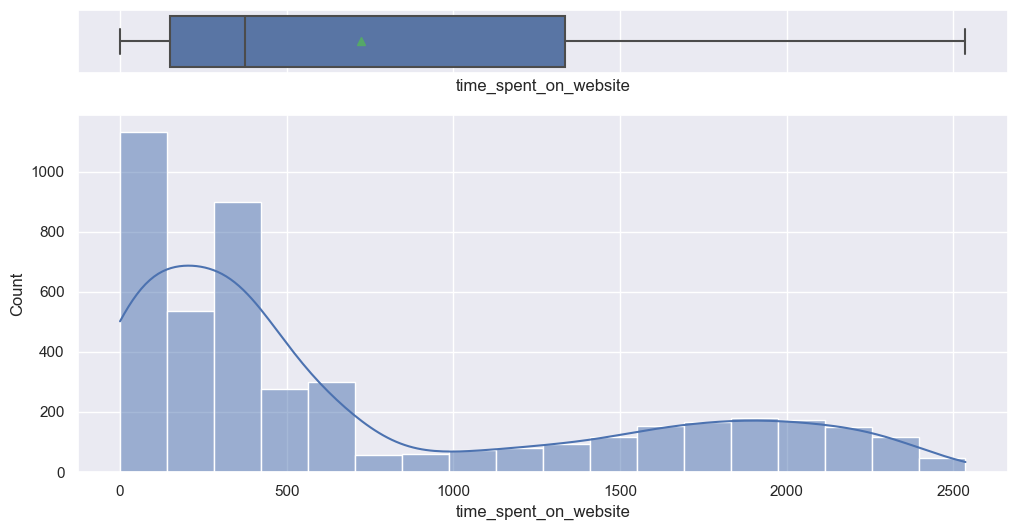

In [80]:
hist_box(df, 'time_spent_on_website')

Observations: We don't really see outliers here. According to the correlation matrix we will see a little further, this is a variable that impacts our target value status.

In [82]:
#Let's analiza page_views_per_visit variable
print(df['page_views_per_visit'].mean())
print(df['page_views_per_visit'].max())
print(df['page_views_per_visit'].min())

3.0261255420641806
18.434
0.0


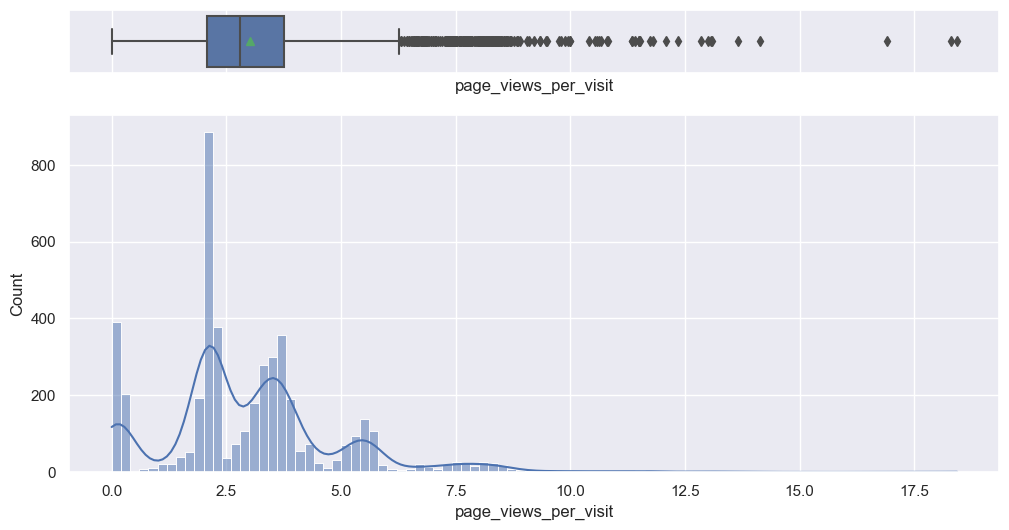

In [83]:
hist_box(df, 'page_views_per_visit')

In [93]:
df[df['page_views_per_visit']>11]

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
32,58,Professional,Mobile App,High,12,1151,18.434,Phone Activity,No,No,No,Yes,No,0
227,48,Unemployed,Website,Medium,2,1942,13.076,Phone Activity,No,No,No,Yes,No,0
268,57,Professional,Mobile App,Medium,3,1009,18.302,Phone Activity,No,No,No,No,No,0
1119,25,Professional,Mobile App,Medium,1,1240,11.739,Website Activity,No,No,No,No,No,0
1999,20,Student,Mobile App,High,1,78,12.357,Website Activity,No,No,No,No,Yes,0
2167,58,Unemployed,Website,High,2,2066,11.506,Email Activity,No,No,Yes,No,No,1
2196,36,Unemployed,Website,Medium,6,2007,12.078,Website Activity,No,No,No,No,No,1
2217,57,Unemployed,Mobile App,Medium,3,1545,13.095,Website Activity,No,No,No,No,No,1
2232,24,Student,Website,High,4,336,11.409,Email Activity,No,No,No,Yes,No,0


In [86]:
print(df['page_views_per_visit'].value_counts())

page_views_per_visit
0.000    181
2.168     14
2.154     13
2.200     12
2.170     11
        ... 
5.793      1
4.944      1
5.624      1
1.413      1
2.692      1
Name: count, Length: 2414, dtype: int64


**Preparing data for modeling


In [96]:
#Deleting outliers

#Website_visits 
df.drop(index=df[df.website_visits>15].index,inplace=True)

#page_views_per_visit
df.drop(index=df[df.page_views_per_visit>11].index,inplace=True)




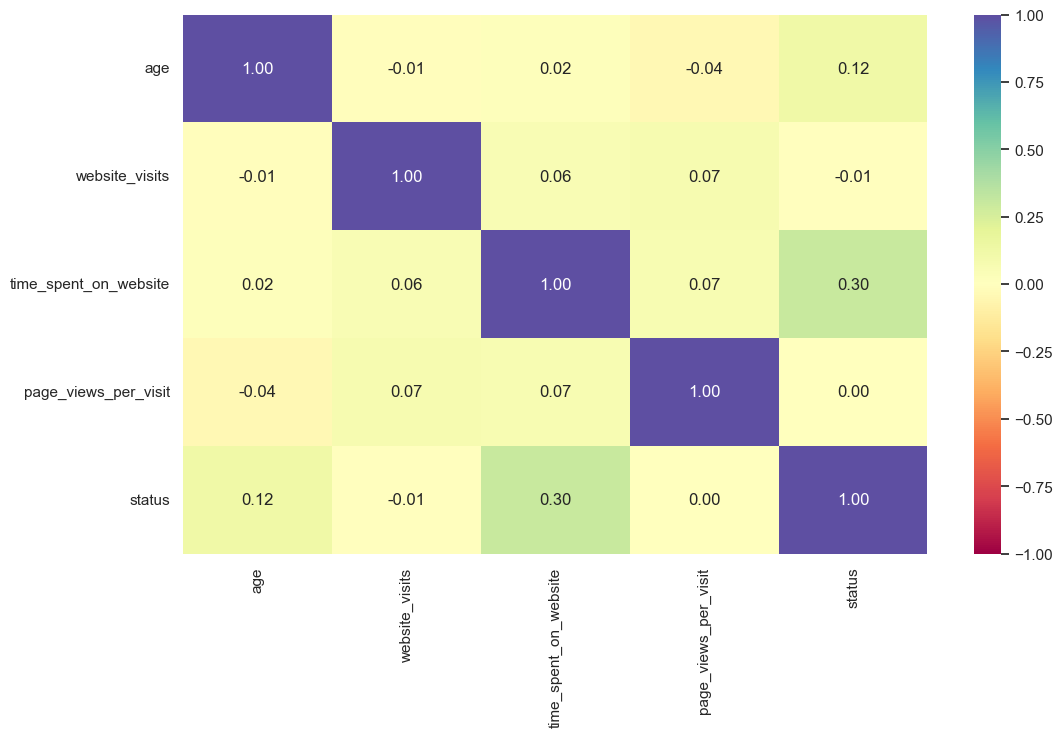

In [97]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Observations. Here we see that Age and time_spent_on_website are highly correlated with our target variable status.

**Any other preprocessing steps (if needed)

Observations: We are good to go.

## EDA

- It is a good idea to explore the data once again after manipulating it.

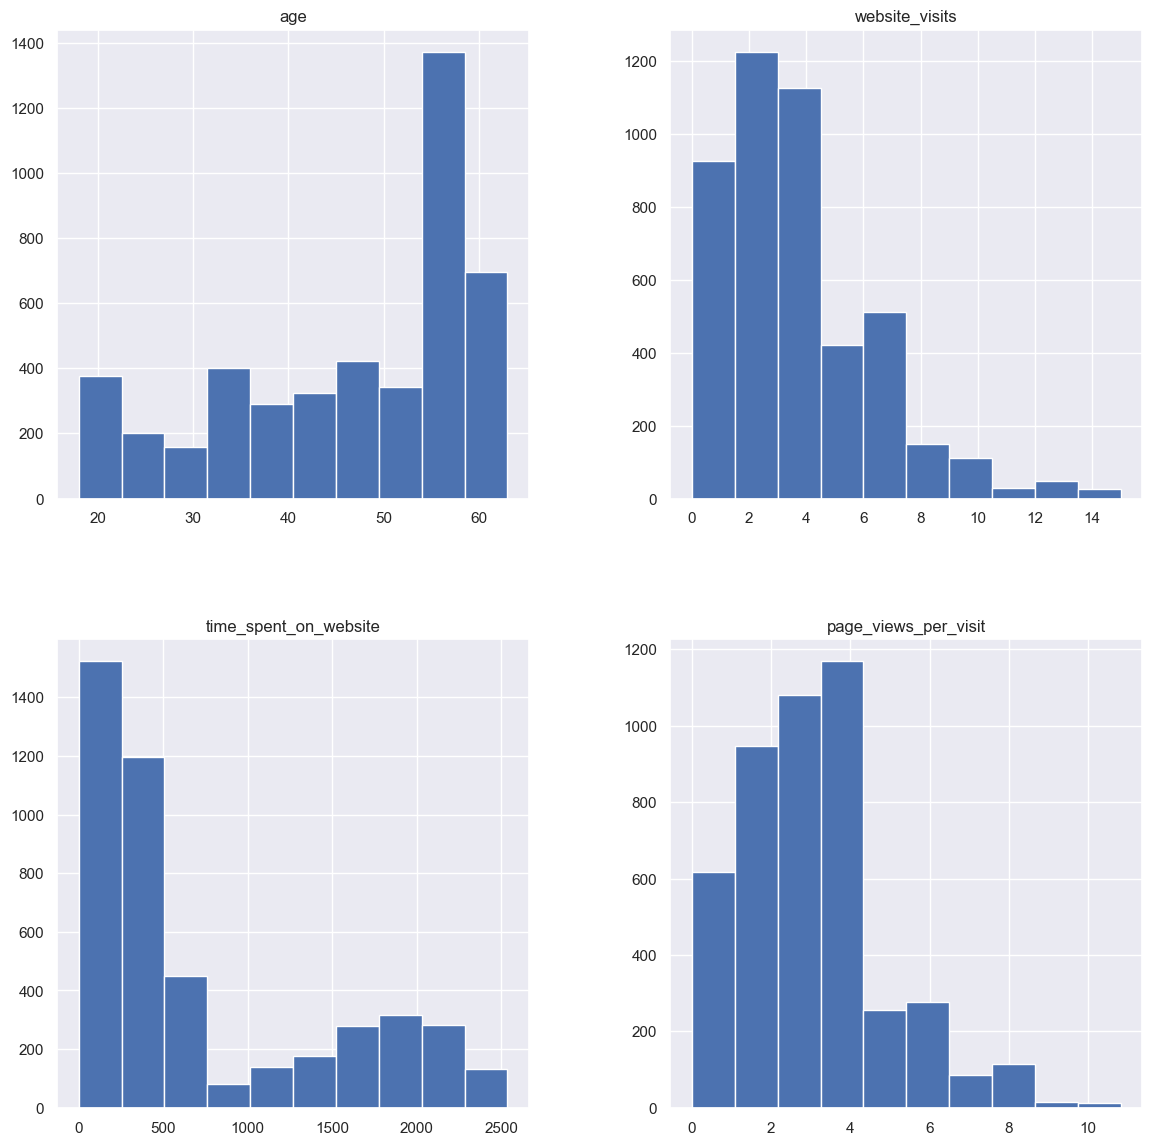

In [98]:
# Lets explore the numerical columns
df[num_cols].hist(figsize=(14,14))
plt.show()

In [105]:
df['age'].value_counts(normalize=True)


age
57    0.083060
58    0.082623
56    0.071257
59    0.071038
60    0.051803
55    0.043497
32    0.040656
53    0.019891
43    0.019454
51    0.019235
54    0.019235
48    0.019016
24    0.019016
49    0.018798
21    0.018579
46    0.018579
50    0.018579
23    0.018361
45    0.018361
42    0.018142
19    0.017705
44    0.017705
47    0.017268
52    0.016831
34    0.016175
33    0.016175
20    0.015738
22    0.015519
41    0.015301
18    0.014426
35    0.014426
40    0.013552
37    0.013115
38    0.012678
36    0.012459
39    0.011366
62    0.010492
63    0.010273
30    0.009617
61    0.008306
31    0.008087
29    0.007869
28    0.005902
25    0.003497
26    0.003279
27    0.003060
Name: proportion, dtype: float64

In [106]:
df['website_visits'].value_counts(normalize=True)


website_visits
2     0.267760
1     0.164153
3     0.139235
4     0.107104
5     0.092240
6     0.061421
7     0.050710
0     0.038033
8     0.032787
9     0.017049
10    0.007432
11    0.006120
12    0.005246
13    0.005027
14    0.003716
15    0.001967
Name: proportion, dtype: float64

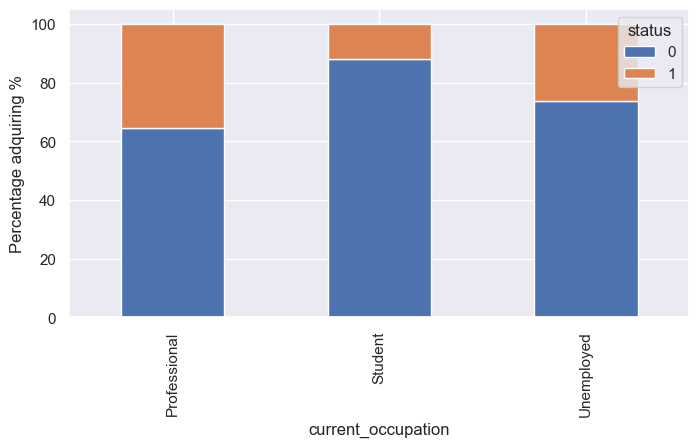

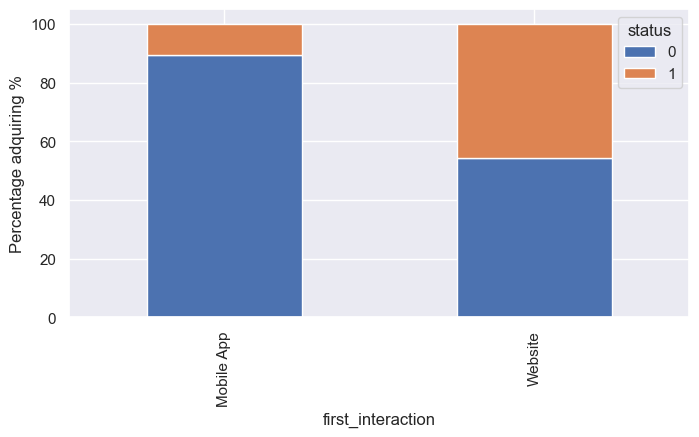

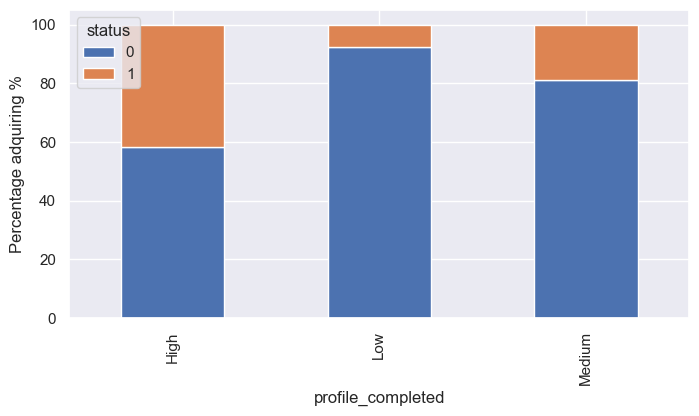

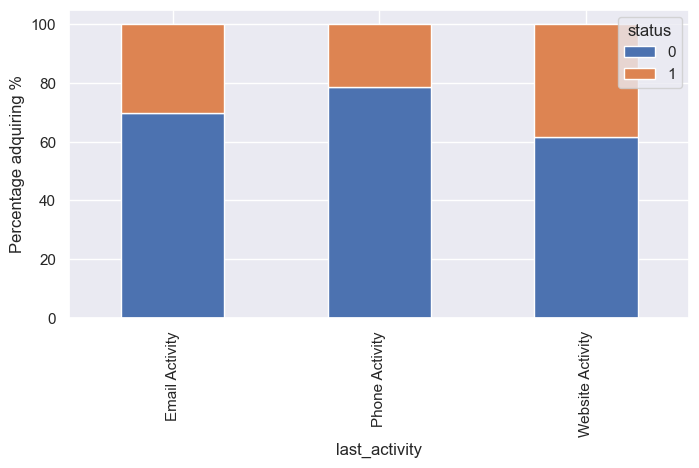

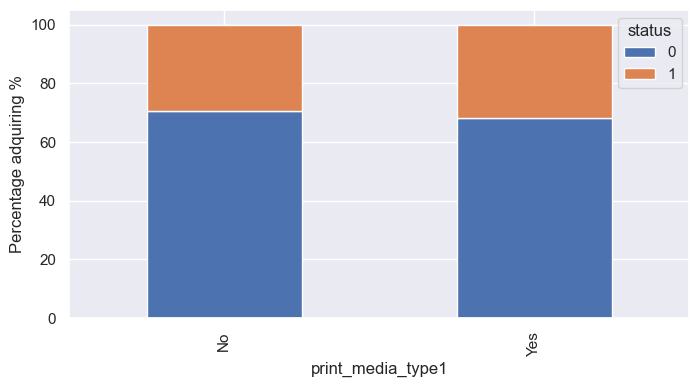

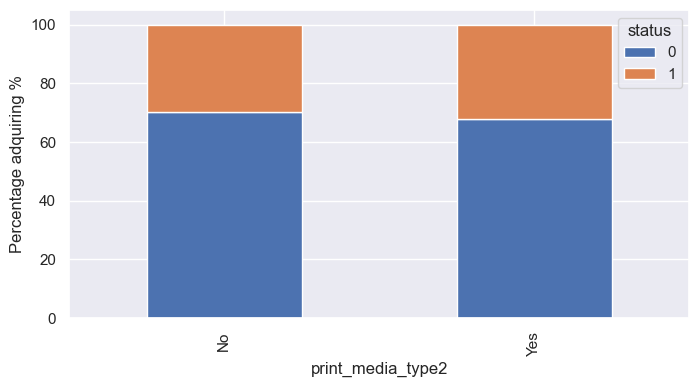

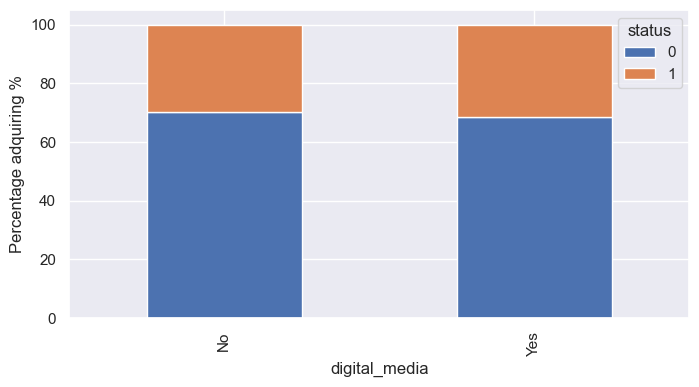

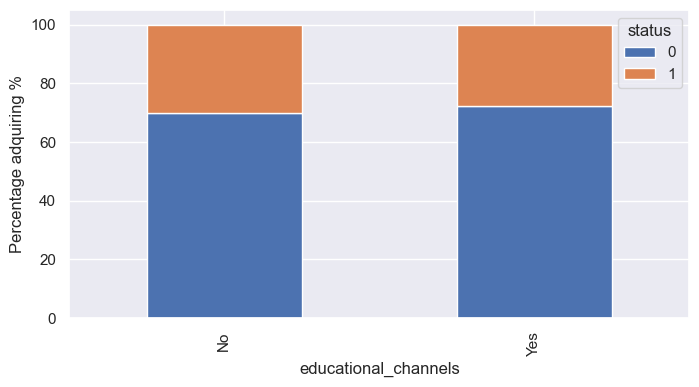

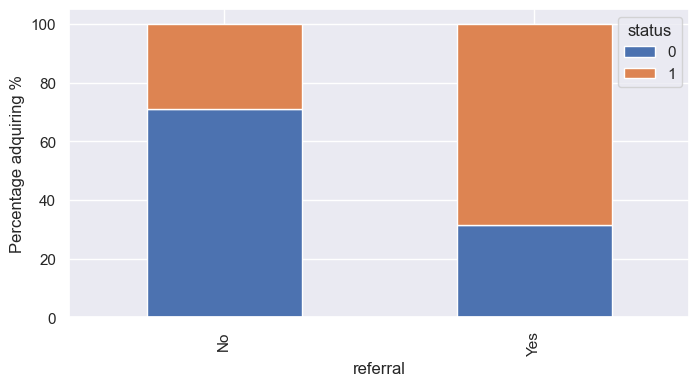

In [99]:
#Lets explore the categorical values all together
for i in cat_cols:
    if i!='status':
        (pd.crosstab(df[i],df['status'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
        plt.ylabel('Percentage adquiring %')

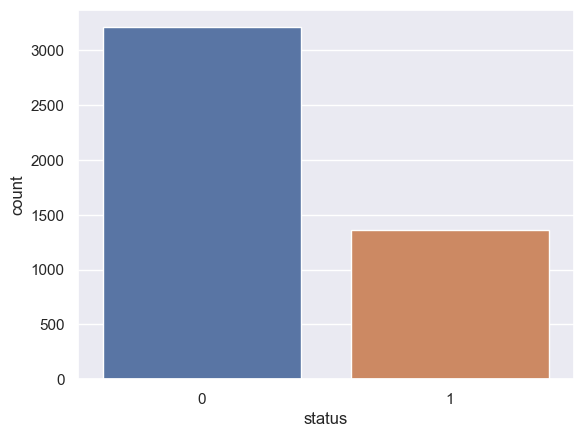

In [100]:
sns.countplot(x = df['status'])
plt.show()

In [101]:
df['status'].value_counts(normalize=True)

status
0    0.701858
1    0.298142
Name: proportion, dtype: float64

In [107]:
df['current_occupation'].value_counts(normalize=True)

current_occupation
Professional    0.567213
Unemployed      0.313224
Student         0.119563
Name: proportion, dtype: float64

Observations: As saw before in the plots, there is around 30% people that get the course, and also the highest occupation getting it are professional (which are also de most lead's occupation).

In [108]:
df['first_interaction'].value_counts(normalize=True)

first_interaction
Website       0.550601
Mobile App    0.449399
Name: proportion, dtype: float64

Observation: website is about 55% but mobile app is not too diferent (45%)

In [109]:
df['profile_completed'].value_counts(normalize=True)

profile_completed
High      0.491148
Medium    0.485902
Low       0.022951
Name: proportion, dtype: float64

In [110]:
df['last_activity'].value_counts(normalize=True)

last_activity
Email Activity      0.494426
Phone Activity      0.266885
Website Activity    0.238689
Name: proportion, dtype: float64

In [112]:
df['print_media_type1'].value_counts(normalize=True)

print_media_type1
No     0.89224
Yes    0.10776
Name: proportion, dtype: float64

In [113]:
df['print_media_type2'].value_counts(normalize=True)

print_media_type2
No     0.94929
Yes    0.05071
Name: proportion, dtype: float64

In [114]:
df['digital_media'].value_counts(normalize=True)

digital_media
No     0.886339
Yes    0.113661
Name: proportion, dtype: float64

In [115]:
df['educational_channels'].value_counts(normalize=True)

educational_channels
No     0.84765
Yes    0.15235
Name: proportion, dtype: float64

In [116]:
df['referral'].value_counts(normalize=True)

referral
No     0.979891
Yes    0.020109
Name: proportion, dtype: float64

In [120]:
df[df['referral']=='Yes']

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
16,47,Professional,Website,High,3,1419,3.450,Email Activity,No,No,Yes,No,Yes,1
52,56,Professional,Website,High,1,582,2.138,Email Activity,No,No,No,No,Yes,1
135,49,Professional,Website,Medium,2,194,7.915,Email Activity,Yes,No,No,No,Yes,0
253,59,Professional,Mobile App,Medium,2,2233,0.066,Website Activity,No,No,No,No,Yes,1
306,56,Professional,Website,High,1,23,3.779,Website Activity,Yes,No,Yes,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,59,Professional,Website,Medium,7,2138,2.285,Phone Activity,No,No,No,No,Yes,0
4468,24,Student,Mobile App,Medium,15,224,3.748,Email Activity,No,No,No,No,Yes,1
4470,40,Unemployed,Mobile App,High,2,1747,6.810,Email Activity,No,No,No,No,Yes,0
4476,34,Professional,Website,High,3,2235,2.068,Email Activity,No,No,No,No,Yes,1


Observation: When we first saw the feature 'referral' looked like than when we have one is very likely we will make the sale; but in the total count, we see that leads that got a referral are just about 92 leads, which is about 2% of total population. But still, referrals is a potential oportunity because most of the leads referred got the program.

In [39]:
data.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


**DATA PREPARATION FOR MODELING

In [127]:
# Creating list of dummy columns
to_get_dummies_for = ['current_occupation', 'first_interaction','profile_completed', 'last_activity','print_media_type1', 'print_media_type2',  'digital_media','educational_channels', 'referral']

# Creating dummy variables
df = pd.get_dummies(data = df, columns = to_get_dummies_for, drop_first = True)      



In [128]:
# Separating target variable and other variables

Y= df.status
X= df.drop(columns = ['status'])

In [129]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In [130]:
df.head()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,57,7,1639,1.861,1,False,True,True,False,False,False,True,True,False,True,False,False
1,56,2,83,0.320,0,False,False,False,False,True,False,True,False,False,False,True,False
2,52,3,330,0.074,0,False,False,True,False,True,False,True,False,False,True,False,False
3,53,4,464,2.057,1,False,True,True,False,False,False,True,False,False,False,False,False
5,50,4,212,5.682,0,False,True,False,False,False,True,False,False,False,False,True,False


In [131]:
# Scaling the data; Our numerical data has different metrics.

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

# Scaling the data
sc=StandardScaler()

# Fit_transform on train data
X_train_scaled=sc.fit_transform(X_train)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X.columns)

# Transform on test data
X_test_scaled=sc.transform(X_test)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X.columns)

Model evaluation criterion:

The model can make wrong predictions as:
Predicting a customer will buy the product and the customer doesn't buy - Loss of resources
Predicting a customer will not buy the product and the customer buys - Loss of opportunity

What is more important for us?
predicting a customer that will not buy the product but at the end he buys it. False Negative.

In [132]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

**Logistic Regression

In [133]:
# Fitting logistic regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2247
           1       0.73      0.65      0.69       955

    accuracy                           0.82      3202
   macro avg       0.79      0.77      0.78      3202
weighted avg       0.82      0.82      0.82      3202



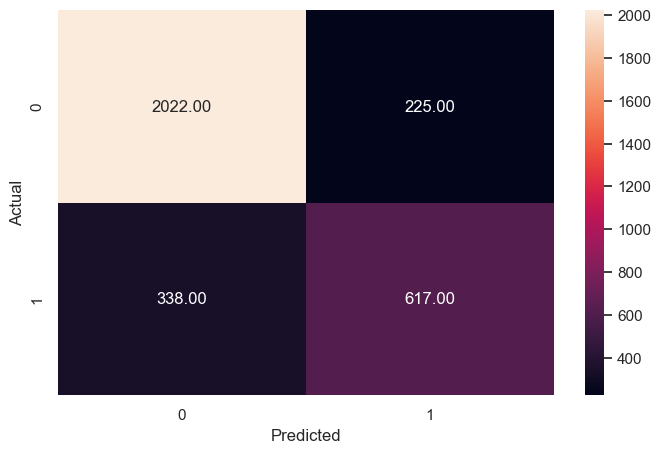

In [134]:
# Checking the performance on the training data
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

Observations: Recall score of 65%; looking good.

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       964
           1       0.70      0.59      0.64       409

    accuracy                           0.80      1373
   macro avg       0.77      0.74      0.75      1373
weighted avg       0.80      0.80      0.80      1373



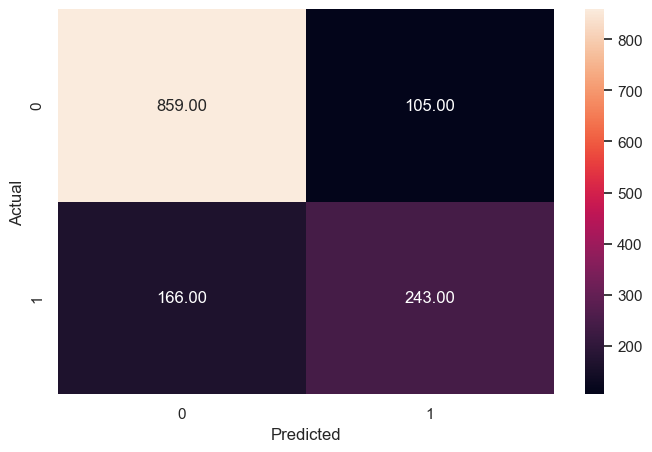

In [135]:
# Checking the performance on the test dataset
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)

Observations: Recall from test sample is 59%, just 6% below the train data. Looks like our model is not overfitting since test data is close to train data, talking about the recall scores between this two.

F1 Scores for both, train and test look good (they are between 60%-70%), but tunning could improve the model.

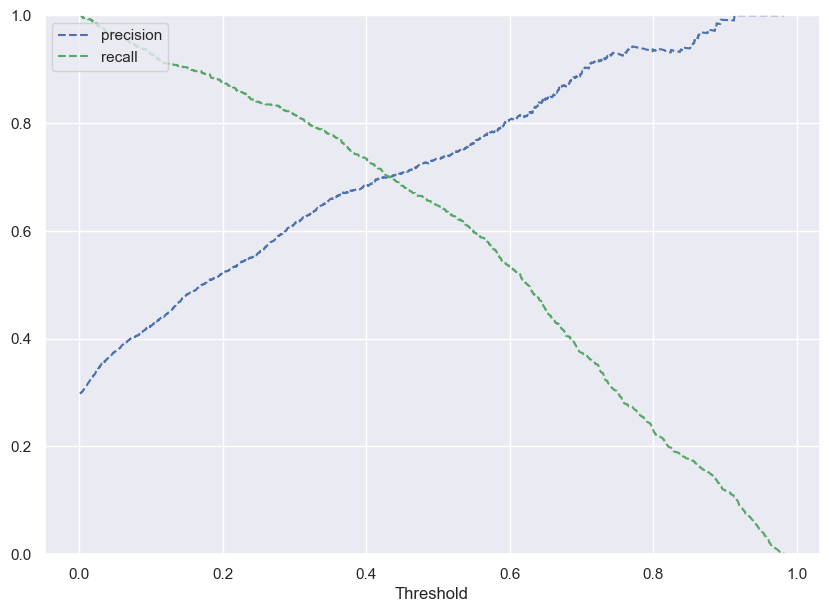

In [136]:
# Predict_proba gives the probability of each observation belonging to each class
y_scores_lg=lg.predict_proba(X_train)

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:,1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()

In [137]:
#Optimal thrshold seems around.42
# Setting the optimal threshold
optimal_threshold = 0.42

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      2247
           1       0.70      0.72      0.71       955

    accuracy                           0.82      3202
   macro avg       0.79      0.79      0.79      3202
weighted avg       0.82      0.82      0.82      3202



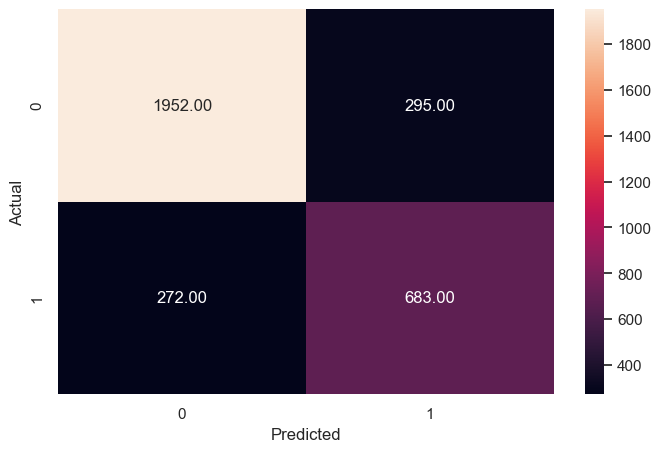

In [138]:
# creating confusion matrix
y_pred_train = lg.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>optimal_threshold)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       964
           1       0.64      0.68      0.66       409

    accuracy                           0.79      1373
   macro avg       0.75      0.76      0.75      1373
weighted avg       0.79      0.79      0.79      1373



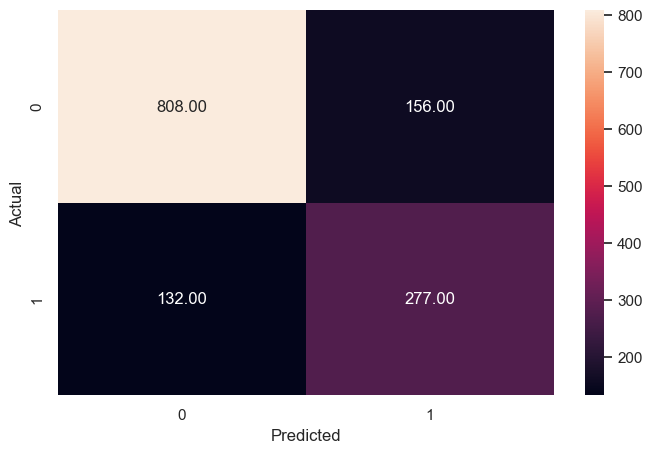

In [139]:
#Now for the test sample using the optimal thrshold of .42
y_pred_test = lg.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>optimal_threshold)

Observations: With the optimal threshold of .42 we got an increase of about 7% more in the recall score for the test data, and 7% more also in the recall of the train data. In both cases (test and train) the F1-score increased 2% for both.

## Building a Decision Tree model

In [140]:
#Building a decision tree
model_dt = DecisionTreeClassifier(random_state=1)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2247
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3202
   macro avg       1.00      1.00      1.00      3202
weighted avg       1.00      1.00      1.00      3202



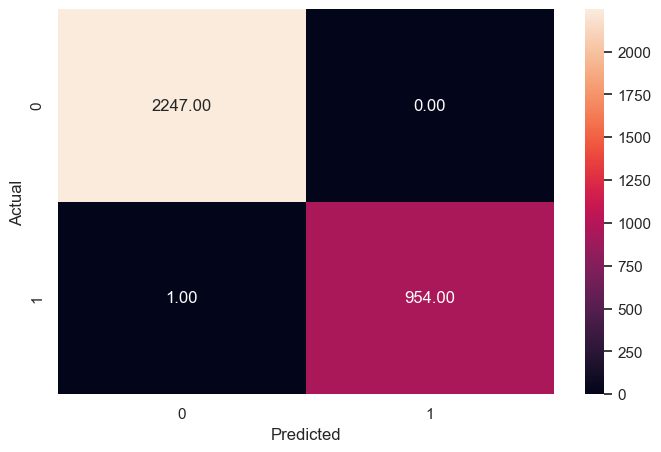

In [141]:
#Let look at the performace
pred_train_dt = model_dt.predict(X_train)
metrics_score(y_train, pred_train_dt)

Observations:
1.- There is just one error on the training set. We predicted the lead was not going to buy the course but it did.
2.- Now we check test data to see if is not overfitting.

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       964
           1       0.65      0.68      0.67       409

    accuracy                           0.80      1373
   macro avg       0.76      0.76      0.76      1373
weighted avg       0.80      0.80      0.80      1373



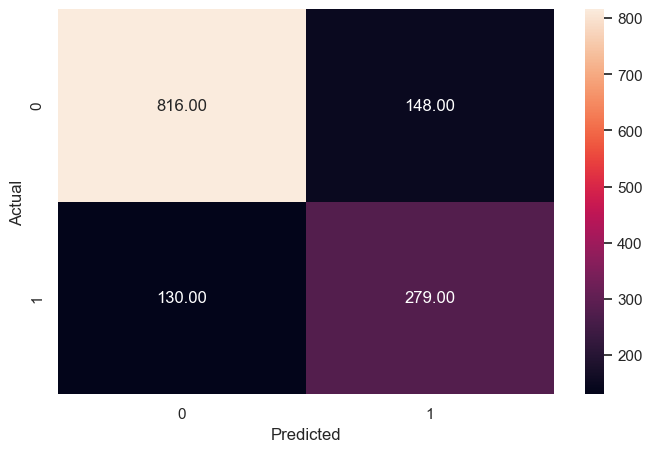

In [142]:
pred_test_dt = model_dt.predict(X_test)
metrics_score(y_test, pred_test_dt)

Observations:
Here we can see that is it overfitting, and the metrics so far seem equivalent with the linear regression and the decision tree.


**Perform hyperparameter tunning for the tree using the GridSearchCV

In [143]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=21, max_leaf_nodes=50, min_samples_split=70,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      2247
           1       0.83      0.76      0.79       955

    accuracy                           0.88      3202
   macro avg       0.86      0.85      0.85      3202
weighted avg       0.88      0.88      0.88      3202



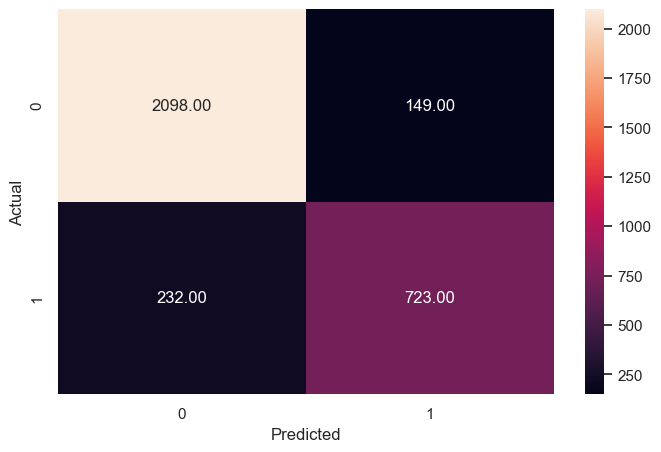

In [144]:
# Checking performance on the training dataset
dt_tuned = estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       964
           1       0.79      0.72      0.75       409

    accuracy                           0.86      1373
   macro avg       0.84      0.82      0.83      1373
weighted avg       0.86      0.86      0.86      1373



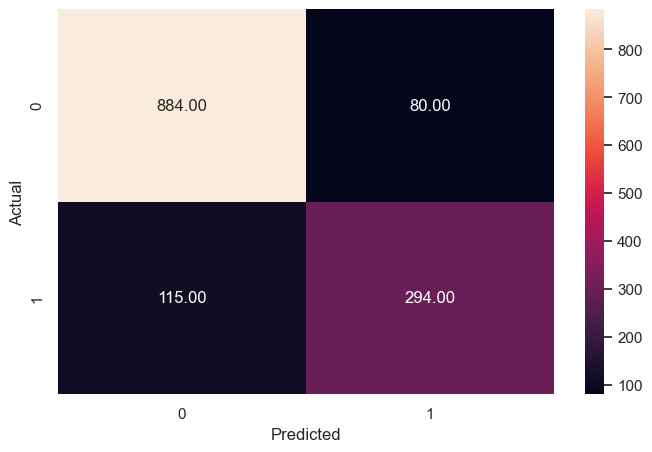

In [145]:
# Checking performance on the training dataset
y_pred_tuned = estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Observations:
We see an improvement in the test set of 14% before tunning and the train data doesn't look "almost perfect" as it was before tunning; but this one is now about 4% better recall than the linear regression.

**Visualizing Decision tree

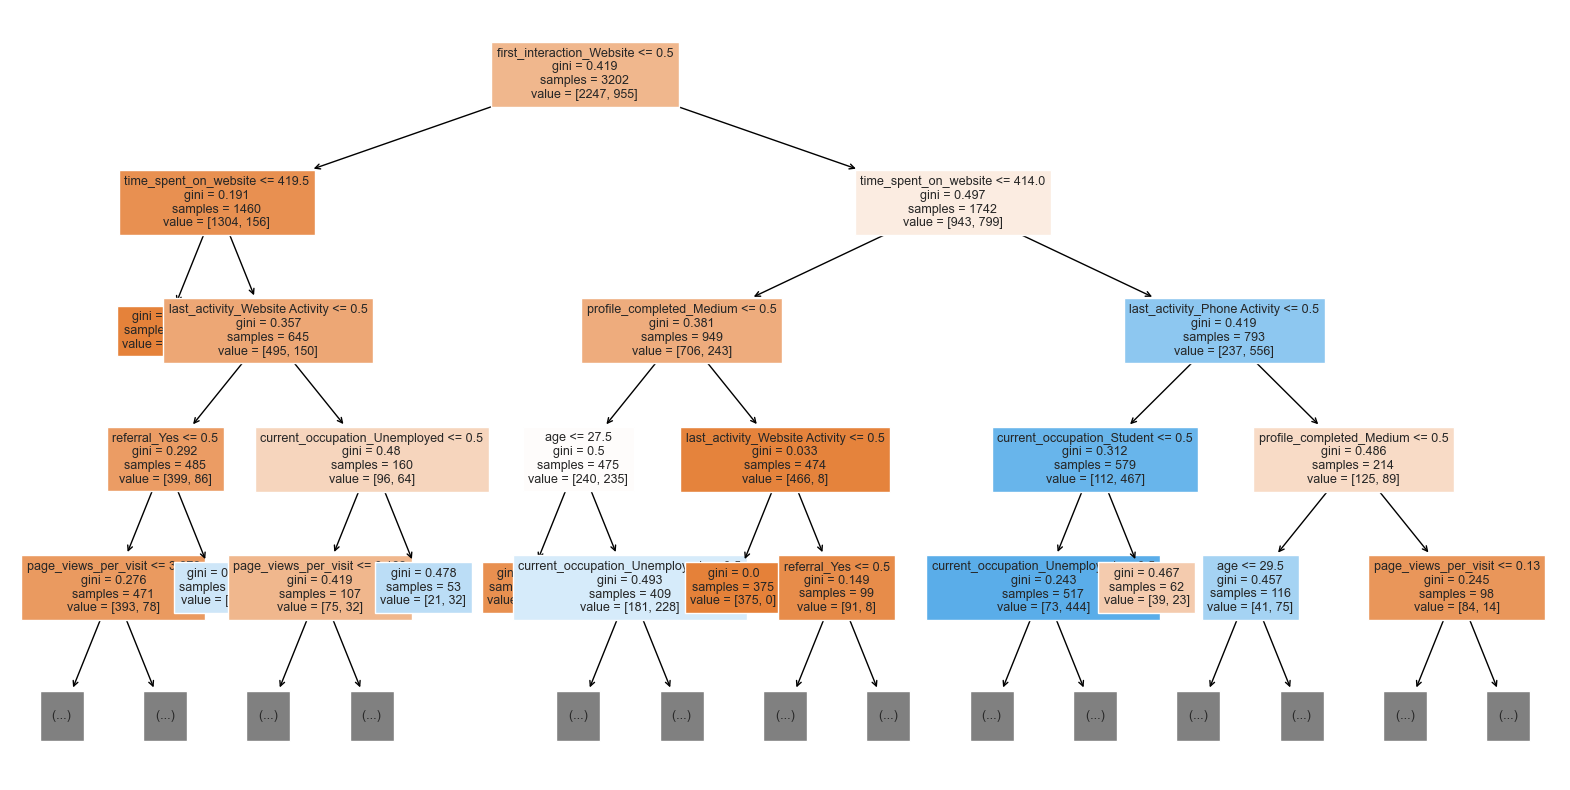

In [146]:
feature_names = list(X_train.columns)
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Check the relative importance

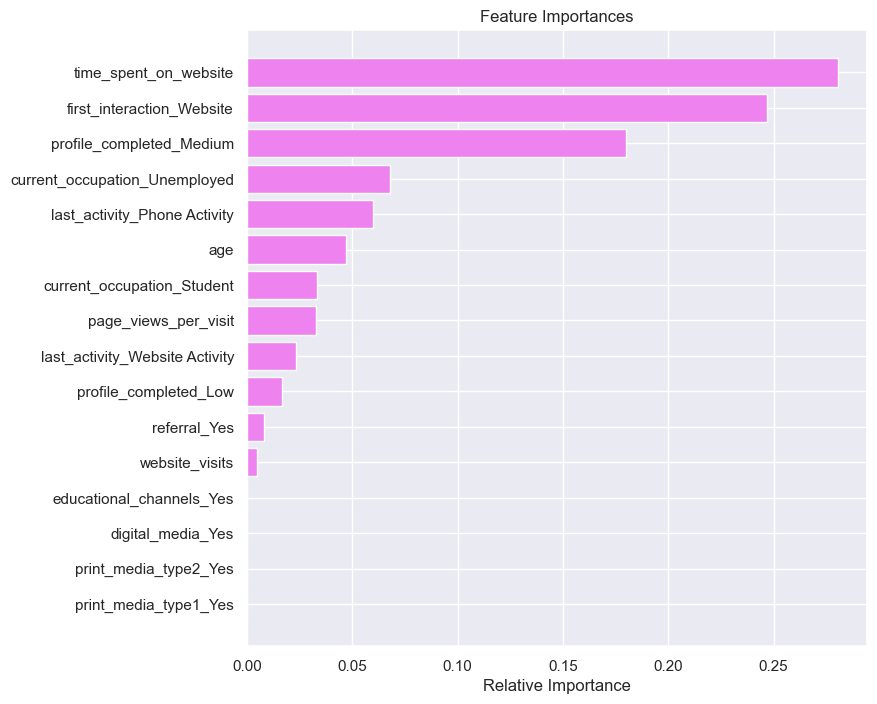

In [147]:
# Importance of features in the tree building
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observations:
After the Feature Importances we can see that:

    time_spent_on_website
    first_interaction_Website
    profile_completed_Medium
   
are the most important features.  Consntant website improvement is a great opportunity as also having the a medium amount of information from the client; here it's an good advice to see what is the data that we first get from the lead and then from there go to a good marketing outreach.

## Do we need to prune the tree?

We don't need to prune the tree. After we did our tunning the change in results were not drastic and also the tree is easy to read.

## Building a Random Forest model

In [148]:
rf_estimator = RandomForestClassifier( random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2247
           1       1.00      1.00      1.00       955

    accuracy                           1.00      3202
   macro avg       1.00      1.00      1.00      3202
weighted avg       1.00      1.00      1.00      3202



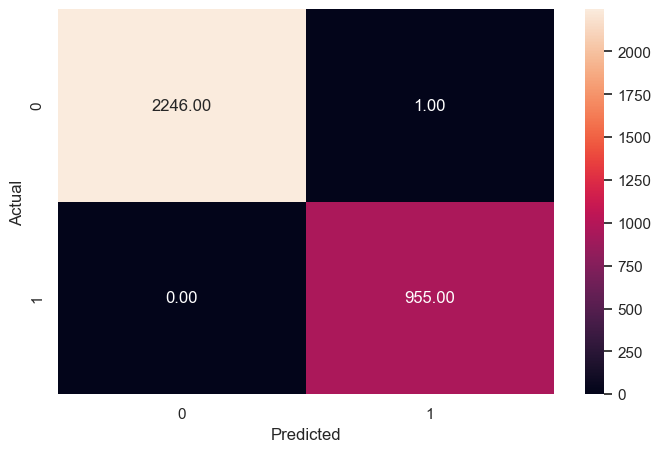

In [149]:
y_pred_train_rf = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train_rf)

Almost zero errors. Let's check the test set

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       964
           1       0.78      0.71      0.74       409

    accuracy                           0.85      1373
   macro avg       0.83      0.81      0.82      1373
weighted avg       0.85      0.85      0.85      1373



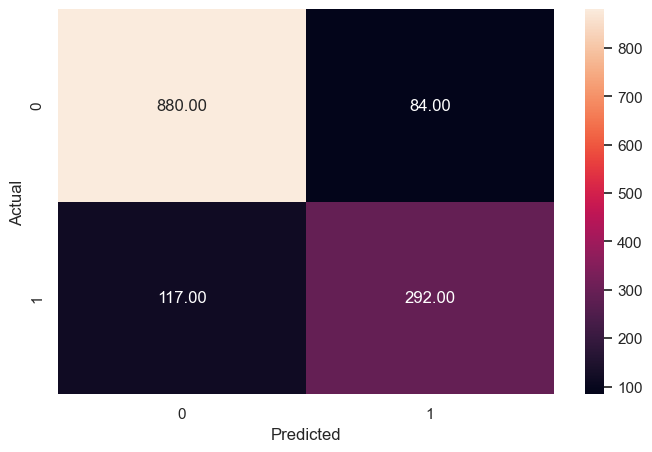

In [150]:
#Test set
y_pred_test_rf = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test_rf)

Observations:
The random forest look like overfitting when we see the metrics of the test versus the train data.
But the recall is not that bad in the test data and also the F1-score seems okay since is over 70%

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance'>

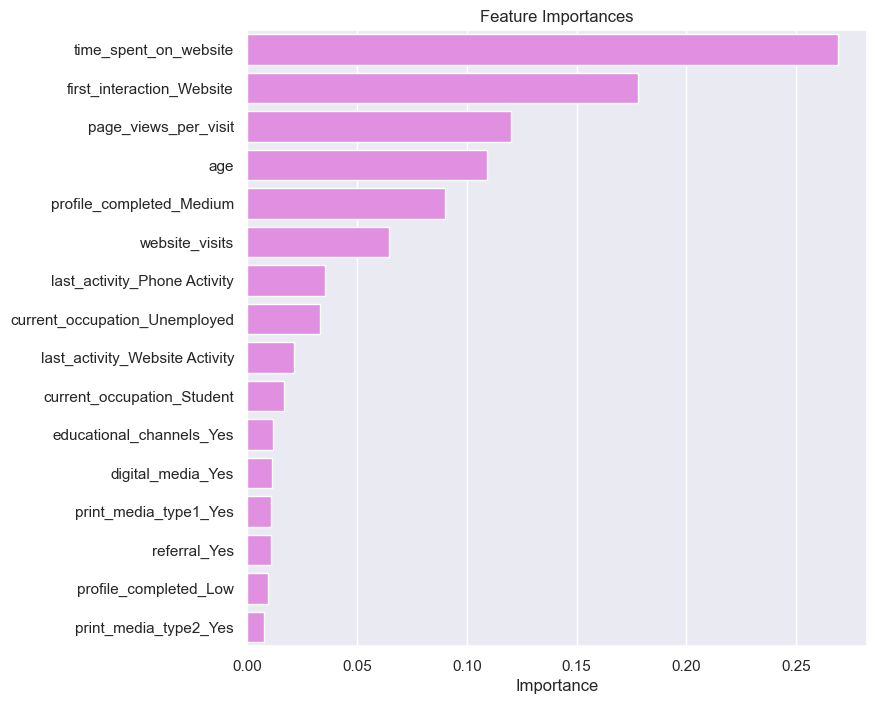

In [152]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

Observations:
In our Random Forest we see the Feature Importances show that:

    time_spent_on_website
    first_interaction_Website
    page_views_per_visit

as the most important features. Our decision tree had the same first two features of importances, but on the third one the decision tree said it was profile_completed_Medium and our random forest showed as a third in importance page_views_per visit. It's interesting because at one point I was considering deleting this feature, but here it looks it performs well (on the decision tree this page_views_per_visit was not as good).

## Do we need to prune the tree?

Looks like overfitting. Yes, we will try to prune it.

In [153]:
# Choose the type of classifier.
rf_estimator = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(1,100,10),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}
# Run the grid search
grid_obj = GridSearchCV(rf_estimator, parameters, cv=5,scoring='recall',n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, max_leaf_nodes=150, min_samples_split=10,
                       random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      2247
           1       0.87      0.80      0.83       955

    accuracy                           0.91      3202
   macro avg       0.90      0.87      0.88      3202
weighted avg       0.90      0.91      0.90      3202



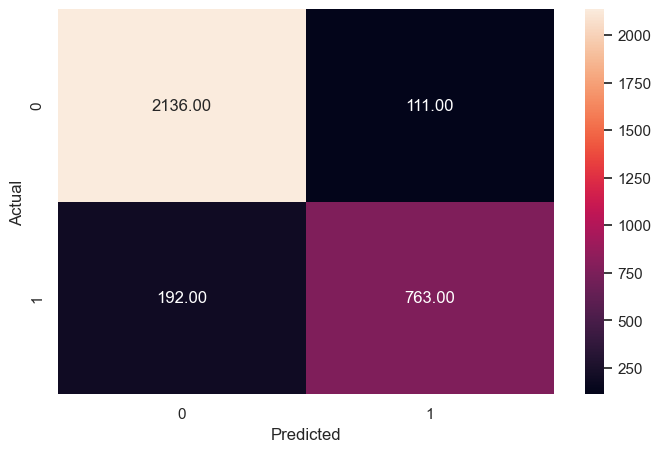

In [154]:
# Checking performance on the training dataset
dt_tuned = rf_estimator.predict(X_train)
metrics_score(y_train,dt_tuned)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       964
           1       0.78      0.73      0.76       409

    accuracy                           0.86      1373
   macro avg       0.84      0.82      0.83      1373
weighted avg       0.86      0.86      0.86      1373



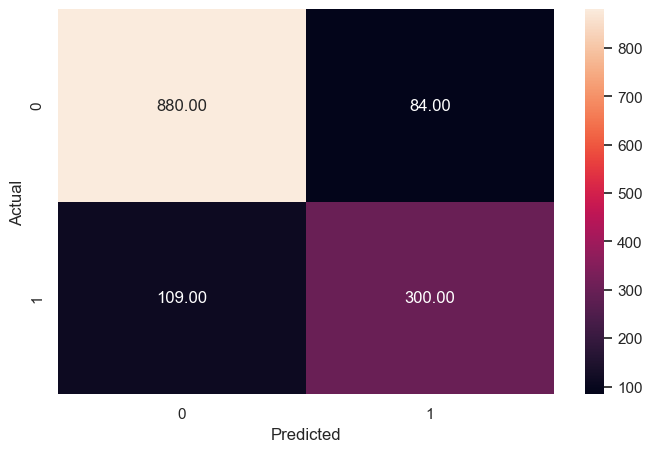

In [155]:
# Checking performance on the training dataset
y_pred_tuned = rf_estimator.predict(X_test)
metrics_score(y_test,y_pred_tuned)

Observations:
The recall in train and test data look so much better, and now after we prune it we don't see the train data is overfitting. Also the f1-score improved in both, train and test.

<Axes: title={'center': 'Feature Importances'}, xlabel='Importance'>

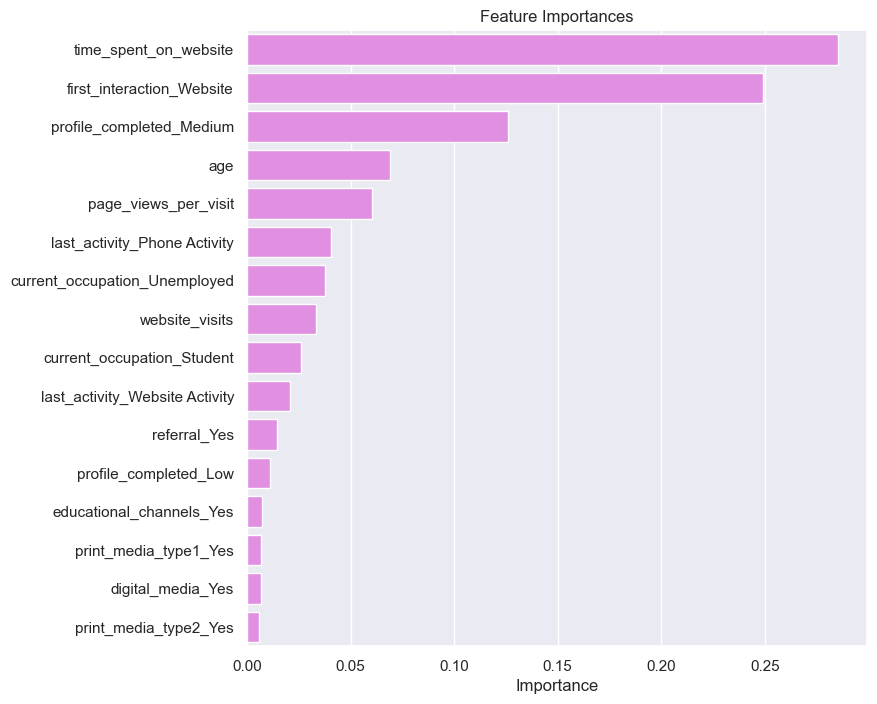

In [160]:
importances = rf_estimator.feature_importances_

columns = X_train.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)


plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

After we tuned our forest tree and run the importances, we see that the three highest features that we got from our decision tree are the same as the ones obtain in the random forest:
   
    time_spent_on_website
    first_interaction_Website
    profile_completed_Medium

Also, we don't see now that the random forest is overfitting on the training data versus the test data.


## Actionable Insights and Recommendations

1.- Our analysis shows website interaction is very important on the decision for a lead to buy or not the course. We see how the time spent on the website and also when the first interaction of the client was on the website as our top2 features. This tell us the company already have a good website, easy to manage and which people can get information that would make them buy the course. So, the company should keep improving their website and the interaction that offers to leads like the live assistant chat option.

2.- Collecting information from the lead is also shown as very important in the decision of the lead to become a client or not. So, analysing which data could even be more relevant is a good opportunity.Keeping the information we need from a lead shouldn't be very large since lead could get upsad and probably the extra data is not relevant. The current data might be pretty good right now but we could find more that can make even better marketing targeting.

3.- We also saw that most of the people that buys the online course are unemloyed but also employed. There is not too much from current students. Maybe the company could advertise a little more on the student's sector through social media they use and other universities' news, meet ups, or so.

4.- People that got a referral is not very large, but the people that get the referral has a high percetage to buy the course. Creating a referral program can be a good strategy for the company to make more sales. Also, this shows the current people that refers the program is happy, because we see how people that were referred gets it; so, keeping high quality in the course and happy students and graduates will keep increasing the positive growing referral.

5.- It's interesting to see how the channels are not really significance, speaking on print and digital. Educational channels seems to perform better. But it might be worthy to make a good study how we can capture more public, specially more students which is a population we are not seeing a lot of leads and at the end sales coming from them.

Thanks for the opportunity for working on this analysis!
Ileana Swanson